# Example notebook for the usage of SensorScanSensor class of SimCATS

This notebook gives an example for the simulation of sensor scans and charge stability diagrams (CSDs) using the SensorScanSensor introduced in SimCATS v2.0. It is assumed, that SimCATS is already installed on the selected kernel.

## Imports

Import the required packages & modules


In [1]:
import numpy as np

from simcats import default_configs, Simulation
from simcats.config_samplers import sample_random_variations_v3_config
from simcats.sensor import SensorScanSensorGeneric, SensorPeakLorentzian, SensorRiseGLF
from simcats.sensor.barrier_function import BarrierFunctionGLF
from simcats.support_functions import plot_csd

DIPlib -- a quantitative image analysis library
Version 3.5.2 (Dec 27 2024)
For more information see https://diplib.org


## Retrieve a default configuration

Default simulation configurations can be retrieved from the simulation module of SimCATS. In this example we need to use the configuration "GaAs_v2_extended_sensor", which uses the SensorScanSensor. It contains a configuration of the ideal CSD structure, various types of distortions, and a configuration for the simulation of the sensor dot reaction.

In [2]:
config = default_configs["GaAs_v2_extended_sensor"]

## Initialize an instance of the Simulation class using the retrieved config

Using the retrieved configuration, we will initialize an instance of the Simulation class. The configuration can be adjusted to other setups, or a completely new configuration can be created.

In [3]:
double_dot_device = Simulation(**config)

## Perform measurements

Now that we have initialized an instance of the Simulation class, we are ready to perform simulations of measurements. To perform measurements, we simply call the function `measure` or `measure_sensor_scan` and supply the desired voltages.

The function `measure` is used to get a simulated CSD and sweeps for (plunger) gates 1 & 2 of the double dot while fixed voltages are applied to the gates of the sensor dot. As a result we get the measured CSD, the ground truth occupation of the dots, the ground truth lead transition mask, and the metadata of the measurement.

The function `measure_sensor_scan` is used to get a simulated sensor scan. For such a sensor scan fixed voltages are applied for the (plunger) gates 1 & 2 of the double dot and the (barrier) gates 1 & 2 of the sensor dot are swept.

The metadata contains the full configuration of the simulation object. As it is possible to set up distortions so that they are only included in a specified ratio/number of scans, the metadata is helpful to see if the distortion has been active in the scan. Additionally, it is possible to allow distortion parameters to vary from scan to scan (to simulate noise fluctuations). For these cases the metadata also provides the last sampled parameters from the specified range. The metadata can also be used to initialize a new instance of the simulation class that has the same configuration as used for the current scan.


### 2D simulation

In this section, we will exemplarily perform a simulation of a 2D measurement of a sensor scan using the retrieved default config.

#### Sensor scan

##### Perform a measurement of a large voltage range

For 2D simulations we simply call the function `measure_sensor_scan` and supply the desired voltage sweeps for gates 1 & 2 of the sensor dot and fixed voltages for the (plunger) gates 1 & 2 of the double dot. However, it is not mandatory to provide a voltage for the (plunger) gates 1 & 2 of the double dot. If no value or None is provided for these gates, an applied voltage of 0 is assumed, enabling the simulation of sensor scans without the influence of the (plunger) gates on the double quantum dot. However, caution is advised, as this may result in the value 0 being used even if the value itself is not lying within the actual limits for the voltages of the (plunger) gates 1 & 2 of the double dot!

Additionally, it is possible to supply a desired resolution. For 2D scans it is required that the resolution consists of two entries. One for the resolution along gate 1 of the sensor and one for the resolution along gate 2 of the sensor (Default is `np.array([100, 100])`). The resolution of both gates is not required to be identical. Distortions are typically defined in relation to swept voltage. The implemented distortions rescale their parameters to match the corresponding pixel resolution (pixel/volt). We will now first perform a scan over the large voltage range.


In [ ]:
sweep_range_sensor_g1 = np.array([-0.7, -0.3])
sweep_range_sensor_g2 = np.array([-0.7, -0.3])

resolution = np.array(
    [600, 600]
)  # first entry is sensor gate 1 resolution and second entry sensor gate 2 resolution

# barrier gate voltages
volt_g1 = -0.1
volt_g2 = -0.1

scan, sensor_regime_mask, sensor_peaks, metadata = double_dot_device.measure_sensor_scan(
    sweep_range_sensor_g1=sweep_range_sensor_g1,
    sweep_range_sensor_g2=sweep_range_sensor_g2,
    volt_g1=volt_g1,
    volt_g2=volt_g2,
    resolution=resolution
)

##### Plot the results

Using the function `plot_csd` it is possible to plot the results of the simulation. It can be used for the sensor scans itself and also for the ground truth data.

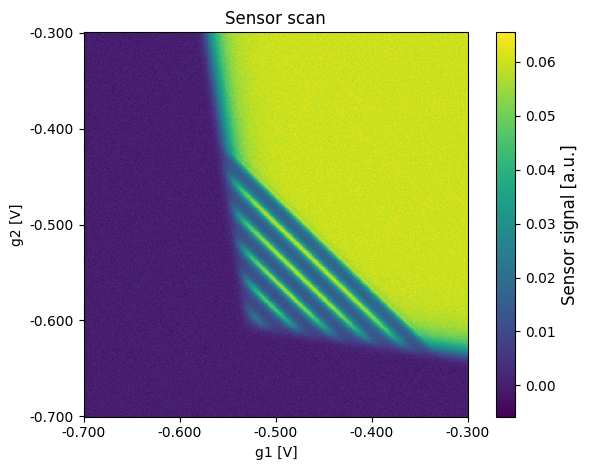

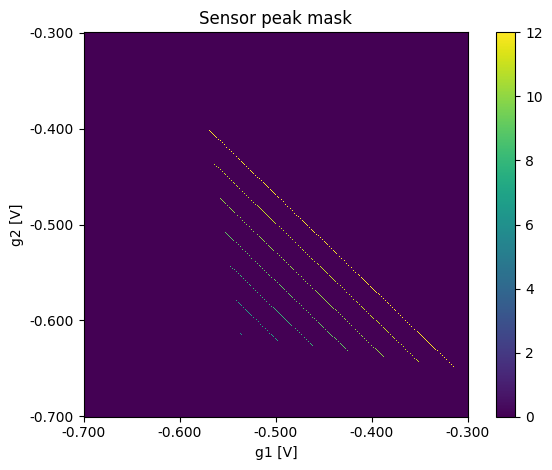

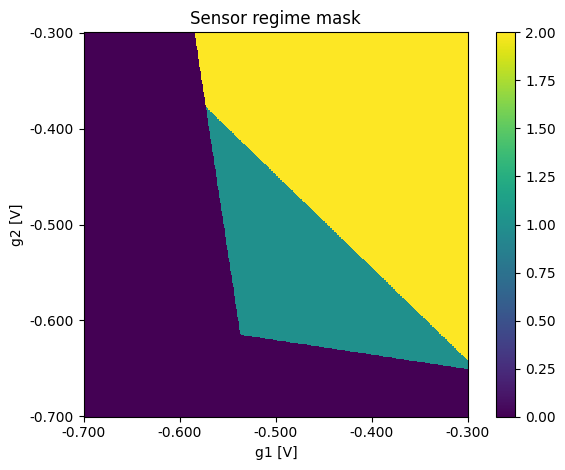

In [5]:
plot_csd(csd=scan, volt_limits_g1=sweep_range_sensor_g1, volt_limits_g2=sweep_range_sensor_g2, title="Sensor scan")
plot_csd(csd=sensor_peaks, volt_limits_g1=sweep_range_sensor_g1, volt_limits_g2=sweep_range_sensor_g2,
         title="Sensor peak mask",
         sensor_label="")
plot_csd(csd=sensor_regime_mask, volt_limits_g1=sweep_range_sensor_g1, volt_limits_g2=sweep_range_sensor_g2,
         title="Sensor regime mask", sensor_label="")

#### CSDs

##### Perform a measurement of the full voltage range

For 2D CSD simulations we simply call the function `measure` and supply the desired voltage sweeps for (plunger) gates 1 & 2 of the double dot and fixed voltages for the gates 1 & 2 of the sensor dot. The voltage for the sensor gates should be selected so that they hit a peak in the sensor scan with a suitable slope.

Additionally, it is possible to supply a desired resolution. For 2D scans it is required that the resolution consists of two entries. One for the resolution along (plunger) gate 1 of the double dot and one for the resolution along (plunger) gate 2 of the double dot (Default is `np.array([100, 100])`). The resolution of both gates is not required to be identical. Distortions are typically defined in relation to swept voltage. The implemented distortions rescale their parameters to match the corresponding pixel resolution (pixel/volt). We will now first perform a scan over the full voltage space (defined by the volt_limits of the configuration).

In [ ]:
# double dot voltages
sweep_range_g1 = np.array([-0.2, -0.087])
sweep_range_g2 = np.array([-0.2, -0.047])
resolution = np.array(
    [400, 400])  # first entry is (plunger) gate 1 resolution and second entry (plunger) gate 2 resolution

# sensor dot voltages
volt_sensor_g1 = -0.5
volt_sensor_g2 = -0.57

csd, occupations, lead_transitions, metadata = double_dot_device.measure(
    sweep_range_g1=sweep_range_g1,
    sweep_range_g2=sweep_range_g2,
    volt_sensor_g1=volt_sensor_g1,
    volt_sensor_g2=volt_sensor_g2,
    resolution=resolution,
)

##### Plot the results

Using the function `plot_csd` it is possible to plot the results of the simulation. It can be used for the CSD itself and also for the ground truth data.

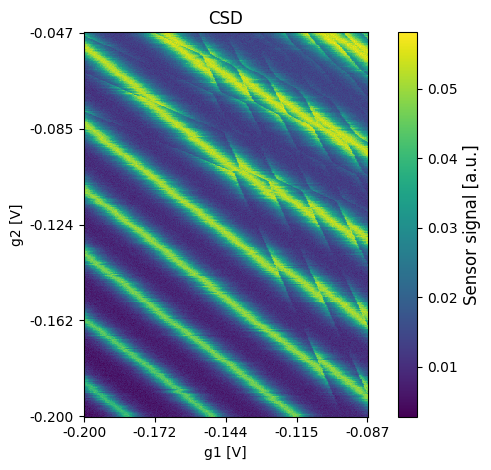

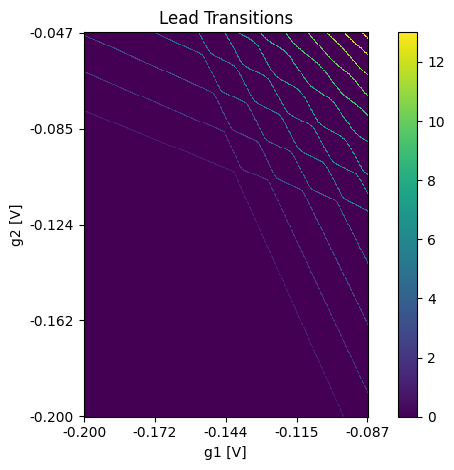

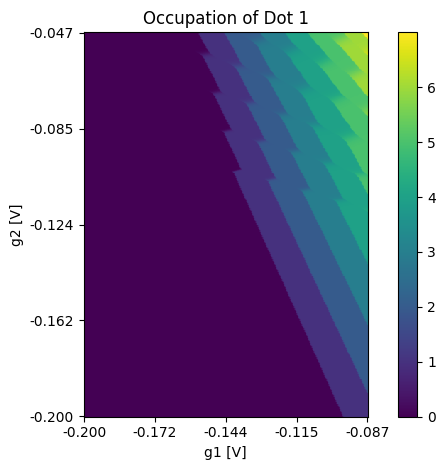

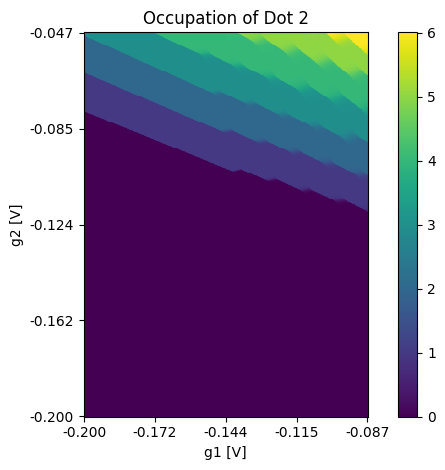

In [7]:
plot_csd(csd=csd, volt_limits_g1=sweep_range_g1, volt_limits_g2=sweep_range_g2, title="CSD")
plot_csd(csd=lead_transitions, volt_limits_g1=sweep_range_g1, volt_limits_g2=sweep_range_g2, title="Lead Transitions", sensor_label="")
plot_csd(csd=occupations[:, :, 0], volt_limits_g1=sweep_range_g1, volt_limits_g2=sweep_range_g2,
         title="Occupation of Dot 1", sensor_label="")
plot_csd(csd=occupations[:, :, 1], volt_limits_g1=sweep_range_g1, volt_limits_g2=sweep_range_g2,
         title="Occupation of Dot 2", sensor_label="")

### 1D simulation

In this section we will exemplarily perform a simulation of a 1D measurement. For the measurement, the previously retrieved config is used again.

#### Sensor scan

##### Perform a measurement

For 1D simulations we can also use the function `measure_sensor_scan` that has been used for the 2D simulations of sensor scans. The only difference compared to a 2D measurement simulation is that we have to supply a single desired resolution that will be used for sweeping both sensor gates simultaneously. Nevertheless, the voltage range of both sensor gates is not required to be identical. The double dot plunger gate voltages are specified in the same way as before. The implemented distortions rescale their parameters to match the corresponding pixel resolution (pixel/volt).



In [ ]:
sweep_range_sensor_g1 = np.array([-0.7, -0.3])
sweep_range_sensor_g2 = np.array([-0.7, -0.3])

resolution = np.array(
    [600]
)  # first entry is sensor gate 1 resolution and second entry sensor gate 2 resolution

# double dot plunger gate voltages
volt_g1 = -0.1
volt_g2 = -0.1

scan, sensor_regime_mask, sensor_peaks, metadata = double_dot_device.measure_sensor_scan(
    sweep_range_sensor_g1=sweep_range_sensor_g1,
    sweep_range_sensor_g2=sweep_range_sensor_g2,
    volt_g1=volt_g1,
    volt_g2=volt_g2,
    resolution=resolution
)

##### Plot the results

As before with the function `plot_csd` it is possible to plot the results of the simulation for 1D data. It can be used for the sensor scans itself and also for the ground truth data.

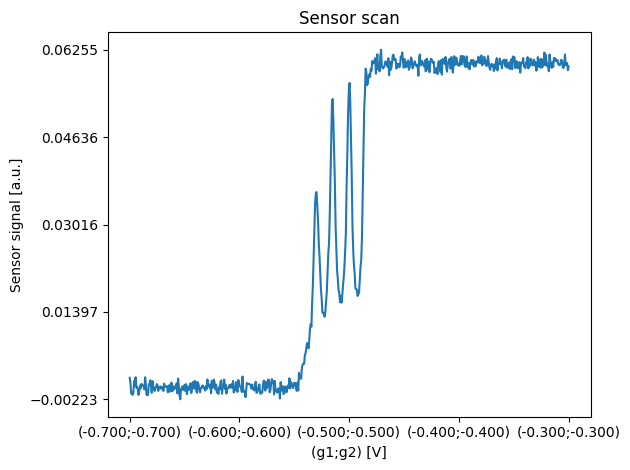

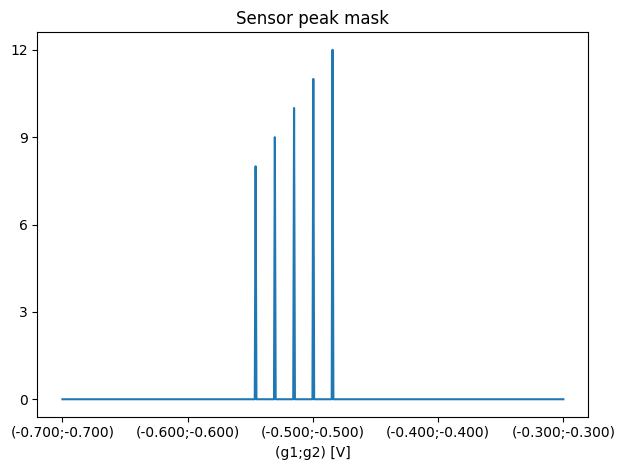

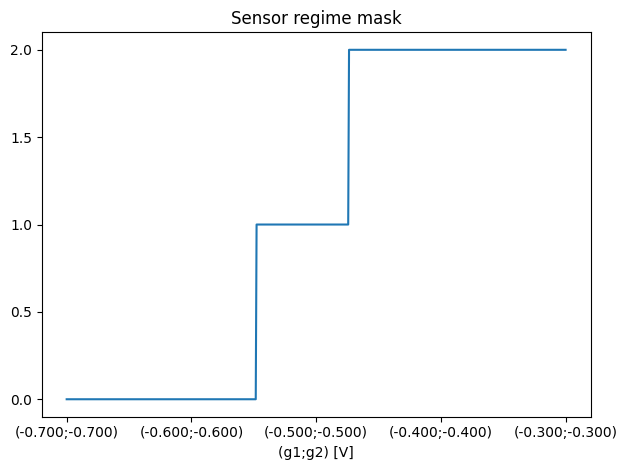

In [9]:
plot_csd(csd=scan, volt_limits_g1=sweep_range_sensor_g1, volt_limits_g2=sweep_range_sensor_g2, title="Sensor scan")
plot_csd(csd=sensor_peaks, volt_limits_g1=sweep_range_sensor_g1, volt_limits_g2=sweep_range_sensor_g2,
         title="Sensor peak mask",
         sensor_label="")
plot_csd(csd=sensor_regime_mask, volt_limits_g1=sweep_range_sensor_g1, volt_limits_g2=sweep_range_sensor_g2,
         title="Sensor regime mask", sensor_label="")

#### CSDs

##### Perform a measurement

For 1D CSD simulations we also call the function `measure` and supply the desired voltage sweeps for (plunger) gates 1 & 2 of the double dot and fixed voltages for gates 1 & 2 of the sensor dot. The voltage for the sensor gates should be selected so that they hit a peak in the sensor scan with a suitable slope. The only difference compared to a 2D measurement simulation is that we have to supply a single desired resolution that will be used for sweeping both gates simultaneously.

In [ ]:
# double dot voltages
sweep_range_g1 = np.array([-0.2, -0.087])
sweep_range_g2 = np.array([-0.2, -0.047])
resolution = np.array(
    [400])  # first entry is (plunger) gate 1 resolution and second entry (plunger) gate 2 resolution

# sensor dot voltages
volt_sensor_g1 = -0.5
volt_sensor_g2 = -0.57

csd, occupations, lead_transitions, metadata = double_dot_device.measure(
    sweep_range_g1=sweep_range_g1,
    sweep_range_g2=sweep_range_g2,
    volt_sensor_g1=volt_sensor_g1,
    volt_sensor_g2=volt_sensor_g2,
    resolution=resolution,
)

##### Plot the results

Using the function `plot_csd` it is possible to plot the results of the simulation. It can be used for the CSD itself and also for the ground truth data.

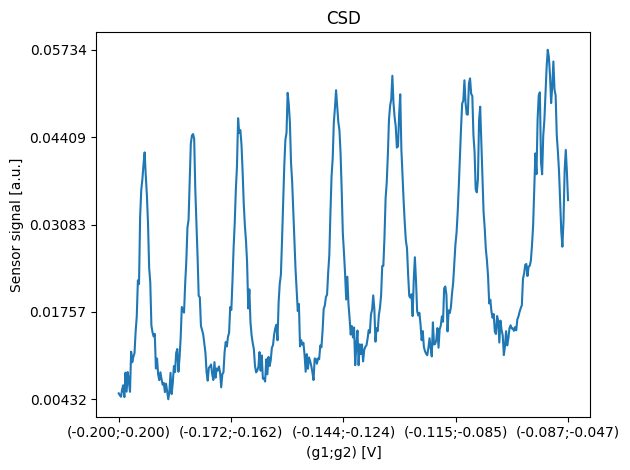

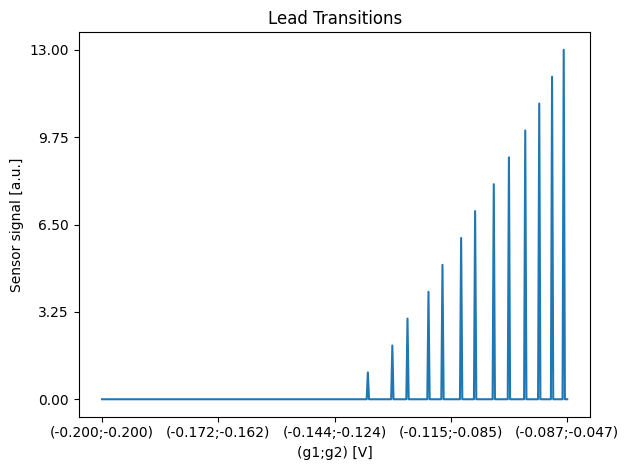

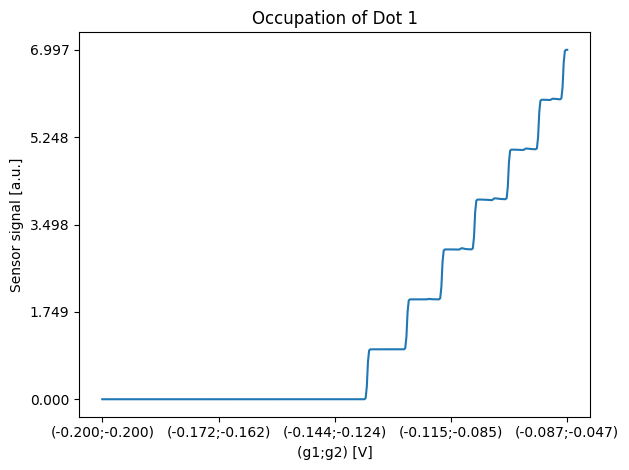

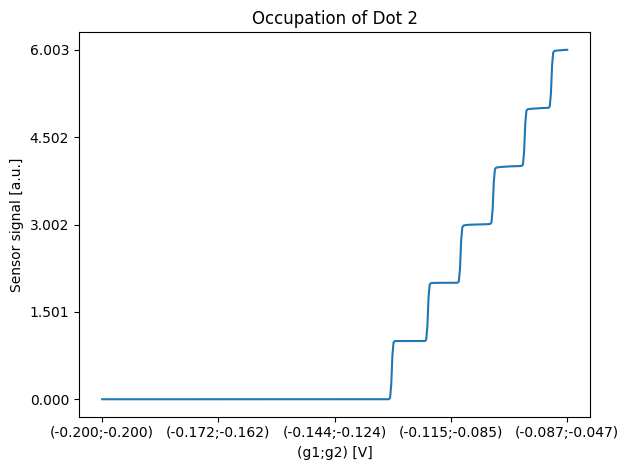

In [11]:
plot_csd(csd=csd, volt_limits_g1=sweep_range_g1, volt_limits_g2=sweep_range_g2, title="CSD")
plot_csd(csd=lead_transitions, volt_limits_g1=sweep_range_g1, volt_limits_g2=sweep_range_g2, title="Lead Transitions")
plot_csd(csd=occupations[:, 0], volt_limits_g1=sweep_range_g1, volt_limits_g2=sweep_range_g2,
         title="Occupation of Dot 1")
plot_csd(csd=occupations[:, 1], volt_limits_g1=sweep_range_g1, volt_limits_g2=sweep_range_g2,
         title="Occupation of Dot 2")

### 2D simulation with a different sensor

In this section we will create a different sensor step by step. With the new sensor configuration we will then exemplarily perform a simulation of a 2D measurement.

#### Setup of a new sensor

In this section we will configure a new sensor and each part of the sensor will be explained.

##### Alpha leverarms

The SensorScanSensor simulation calculates three distinct potentials: one for each of the two barriers and one for the sensor dot itself. These calculations utilize lever arms that quantify how different components influence each potential.

**Gate Lever Arms (`alpha_gate` and `alpha_sensor_gate`)**: Define how applied voltages during a simulated scan affect the potentials. These values should be positive and are specified as 3×2 arrays representing [sensor_dot, barrier1, barrier2] potentials influenced by [gate1, gate2] voltages. The `alpha_gate` lever arms can also be specified as a 2-element array if the same lever arms apply to all three potentials.

**Dot Lever Arms (`alpha_dot`)**: Specify how the occupations of the double dot influence the sensor dot potential. These values should be negative and are specified as 3×2 arrays representing [sensor_dot, barrier1, barrier2] potentials influenced by [left_dot, right_dot] occupations. Can also be specified as a 2-element array if the same lever arms apply to all three potentials.

**Potential Offset (`offset_mu_sens`)**: Provides a constant offset for the electrochemical potentials. Specified as a 3-element array for [sensor_dot, barrier1, barrier2] baseline potentials. The offset can also be specified as single value if the offset added to all the potentials should be the same.

In [12]:
alpha_gate = np.array([0.1, 0.1])
alpha_sensor_gate = np.array([[0.1, 0.1], [0.99, 0.15], [0.15, 0.99]])
alpha_dot = np.array([-0.0008, -0.0005])

##### Sensor peak function and final rise

The `SensorScanSensorGeneric` class simulates the total sensor response by modeling three responses and combining them. The overall response results from the combined contributions of the two barriers and the sensor dot, which can be modeled as three resistors in series. A response is calculated by applying a function to the corresponding potential.

The `sensor_peak_function` and `final_rise` together model the sensor response. The `sensor_peak_function` describes the Coulomb peaks. These are represented here using Lorentzians using the class `SensorPeakLorentzian`. The `final_rise` describes the rise of the sensor response to its maximum when both barriers are completely open and the sensor is fully conducting. The rise to the maximum response is shifted during the response calculation to match the point where the barriers are completely open. `sensor_peak_function` and `final_rise` are combined into the sensor response by taking the maximum of both.

When defining the `sensor_peak_function`, care must be taken to ensure that enough peaks are defined that also match the voltages applied to the gates. If too few peaks are defined, it is possible, for example, that during the simulation of a sensor scan, no wave fronts will be visible due to the variation in the voltage applied to the double dot plunger gates g1 and g2.

In [13]:
sensor_peak_function = [
    SensorPeakLorentzian(mu0=-0.157, gamma=0.0005, height=0.09, offset=0),
    SensorPeakLorentzian(mu0=-0.154, gamma=0.0005, height=0.09, offset=0),
    SensorPeakLorentzian(mu0=-0.151, gamma=0.0005, height=0.09, offset=0),
    SensorPeakLorentzian(mu0=-0.148, gamma=0.0005, height=0.09, offset=0),
    SensorPeakLorentzian(mu0=-0.145, gamma=0.0005, height=0.09, offset=0),
    SensorPeakLorentzian(mu0=-0.142, gamma=0.0005, height=0.09, offset=0),
    SensorPeakLorentzian(mu0=-0.139, gamma=0.0005, height=0.09, offset=0),
    SensorPeakLorentzian(mu0=-0.136, gamma=0.0005, height=0.09, offset=0),
    SensorPeakLorentzian(mu0=-0.133, gamma=0.0005, height=0.09, offset=0),
    SensorPeakLorentzian(mu0=-0.130, gamma=0.0005, height=0.09, offset=0),
    SensorPeakLorentzian(mu0=-0.127, gamma=0.0005, height=0.09, offset=0),
    SensorPeakLorentzian(mu0=-0.124, gamma=0.0005, height=0.09, offset=0),
    SensorPeakLorentzian(mu0=-0.121, gamma=0.0005, height=0.09, offset=0),
]
final_rise = SensorRiseGLF(mu0=0,
                           asymptote_left=0,
                           asymptote_right=0.1,
                           growth_rate=1200,
                           asymmetry=0.07,
                           shape_factor=2)

###### Sensor deformation

The `SensorScanSensorGeneric` also allows the wavefronts in sensor scans to be deformed. This is done by classes that implement the class `SensorPeakDeformationInterface` . The use of such deformations is optional and only valid for the simulation of sensor scans! The deformations cannot be used in the simulation of CSDs!

The deformations are passed to the constructor of the `SensorScanSensorGeneric`. They are passed as a dictionary with the number (id) of the wavefront to be deformed as the key and the deformation object as the value. The number (id) of a wavefront is the position of the peak in the sensor peak function. The deformations of a created object can also be modified later on.

Explicit examples of these deformation classes are `SensorPeakDeformationCircle` and `SensorPeakDeformationLinear`. These  circularly deform the wavefronts or tilt them.

##### Barrier functions

Barrier functions model the response of the barriers of the sensor dot.
For the barrier response, either a single barrier function can be passed that is used to model the response of both barriers, or two individual barrier functions can be passed. In this example a single barrier function is used here to model the barrier response of both barriers in the same way.

Any class that implements the `BarrierFunctionInterface` interface can be used.
In this example we will use the `BarrierFunctionGLF` class, which uses a generalized logistic function to model the barrier response.


In [14]:
barrier_functions = BarrierFunctionGLF(pinch_off_percentage=0.01,
                                       fully_conductive_percentage=0.99,
                                       asymptote_left=0,
                                       asymptote_right=0.3,
                                       growth_rate=70,
                                       asymmetry=0.25,
                                       shape_factor=25.64528635013381,
                                       denominator_offset=1,
                                       offset=-0.7)

#### Update the simulation configuration

Here, a `SensorScansSensorGeneric` is defined using the predefined parts, and the previously used sensor is overwritten with this. It can then be used for the simulation in the following.

In [15]:
old_sensor = double_dot_device.sensor

new_sensor = SensorScanSensorGeneric(
    sensor_peak_function=sensor_peak_function,
    final_rise=final_rise,
    barrier_functions = barrier_functions,
    alpha_gate=alpha_gate,
    alpha_sensor_gate=alpha_sensor_gate,
    alpha_dot=alpha_dot,
)

double_dot_device.sensor = new_sensor

#### Sensor scan

##### Perform a measurement of a large voltage range

Similar to the section above, a measurement is performed over a large voltage range. However, the different sensor that was defined in advance is used here.

In [16]:
sweep_range_sensor_g1 = np.array([-0.7, -0.3])
sweep_range_sensor_g2 = np.array([-0.7, -0.3])

resolution = np.array(
    [600, 600]  
)  # first entry is sensor gate 1 resolution and second entry sensor gate 2 resolution

# double dot plunger voltages
volt_g1 = -0.2
volt_g2 = -0.2

scan, sensor_regime_mask, sensor_peaks, metadata = double_dot_device.measure_sensor_scan(
    sweep_range_sensor_g1=sweep_range_sensor_g1,
    sweep_range_sensor_g2=sweep_range_sensor_g2,
    volt_g1=volt_g1,
    volt_g2=volt_g2,
    resolution=resolution
)

##### Plot the results

Using the function `plot_csd` it is possible to plot the results of the simulation. It can be used for the sensor scans itself and also for the ground truth data.

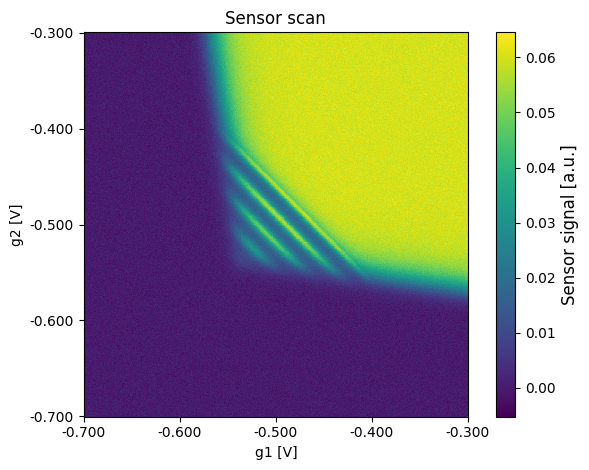

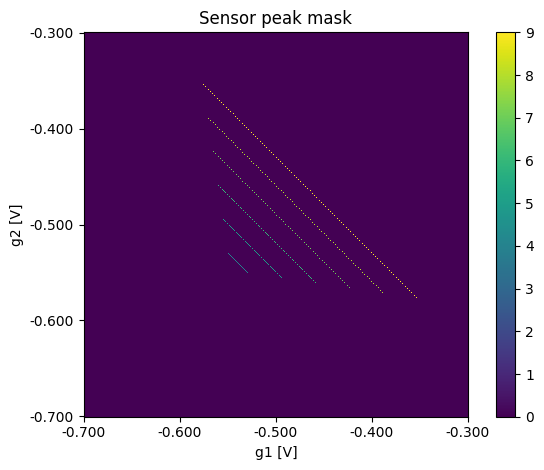

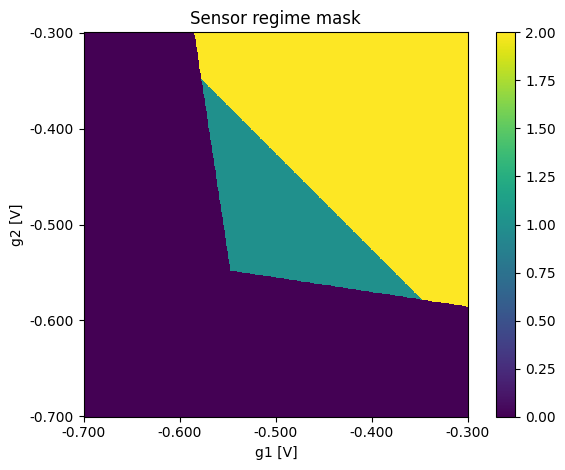

In [17]:
plot_csd(csd=scan, volt_limits_g1=sweep_range_sensor_g1, volt_limits_g2=sweep_range_sensor_g2, title="Sensor scan")
plot_csd(csd=sensor_peaks, volt_limits_g1=sweep_range_sensor_g1, volt_limits_g2=sweep_range_sensor_g2,
         title="Sensor peak mask",
         sensor_label="")
plot_csd(csd=sensor_regime_mask, volt_limits_g1=sweep_range_sensor_g1, volt_limits_g2=sweep_range_sensor_g2,
         title="Sensor regime mask", sensor_label="")

#### CSDs

##### Perform a measurement of the full voltage range

As described above, a CSD can be simulated after the sensor scan and the correct setting of the sensor gates.

In [ ]:
# double dot voltages
sweep_range_g1 = np.array([-0.2, -0.087])
sweep_range_g2 = np.array([-0.2, -0.047])
resolution = np.array(
    [400, 400])  # first entry is (plunger) gate 1 resolution and second entry (plunger) gate 2 resolution

# sensor dot voltages
volt_sensor_g1 = -0.55
volt_sensor_g2 = -0.55

csd, occupations, lead_transitions, metadata = double_dot_device.measure(
    sweep_range_g1=sweep_range_g1,
    sweep_range_g2=sweep_range_g2,
    volt_sensor_g1=volt_sensor_g1,
    volt_sensor_g2=volt_sensor_g2,
    resolution=resolution,
)

##### Plot the results

Using the function `plot_csd` it is possible to plot the results of the simulation. It can be used for the sensor scans itself and also for the ground truth data.


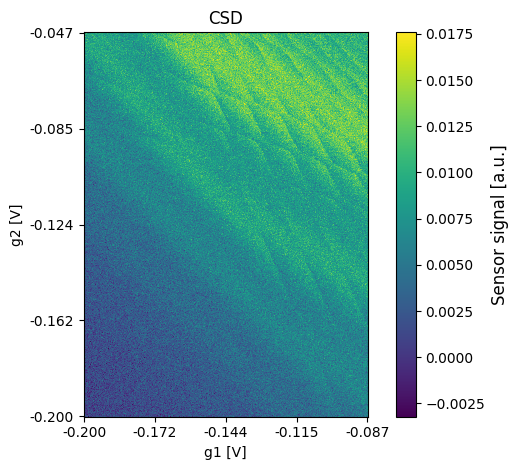

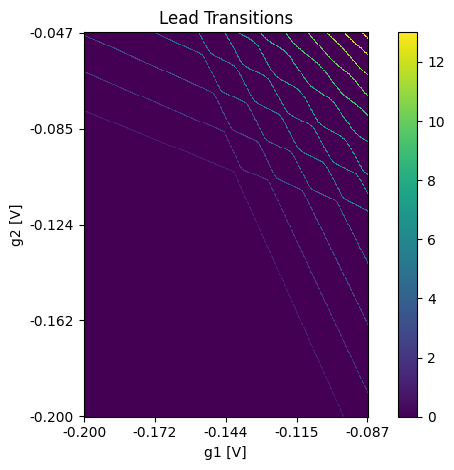

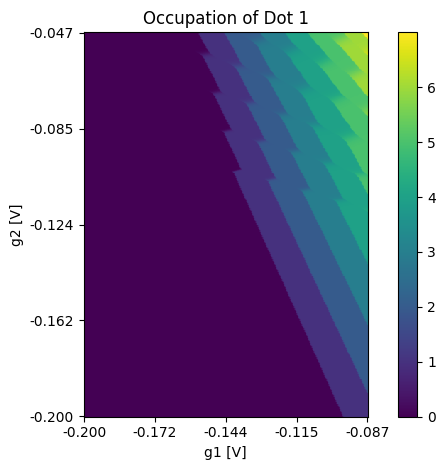

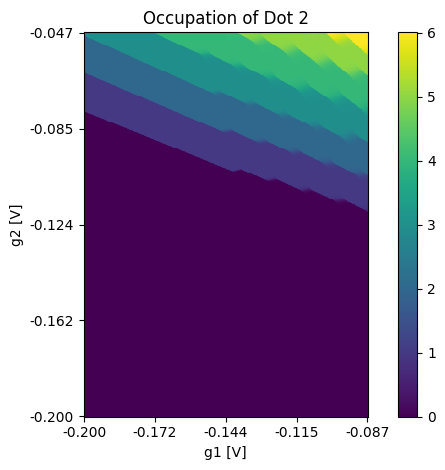

In [19]:
plot_csd(csd=csd, volt_limits_g1=sweep_range_g1, volt_limits_g2=sweep_range_g2, title="CSD")
plot_csd(csd=lead_transitions, volt_limits_g1=sweep_range_g1, volt_limits_g2=sweep_range_g2, title="Lead Transitions", sensor_label="")
plot_csd(csd=occupations[:, :, 0], volt_limits_g1=sweep_range_g1, volt_limits_g2=sweep_range_g2,
         title="Occupation of Dot 1", sensor_label="")
plot_csd(csd=occupations[:, :, 1], volt_limits_g1=sweep_range_g1, volt_limits_g2=sweep_range_g2,
         title="Occupation of Dot 2", sensor_label="")

### 2D Simulation with a sampled sensor

#### Sample a new sensor config

SimCATS makes it possible to use samplers that enable the rapid creation of random configs. As an example, sample_random_variations_v3_config is used here to sample configs that represent GaAs samples. With this sampler a single config is sampled and used to create a new double dot device for the simulation.

In [20]:
config = sample_random_variations_v3_config(
    sensor_type="SensorScanSensorGeneric",
    quality_multiplier=1.0
)

double_dot_device = Simulation(**config)

#### Sensor scan

##### Perform a measurement over a large voltage range

The simulation can be used exactly as before. However, it should be noted that the voltages specified here for the sensor gates and plunger gates may not be optimal for the randomly sampled configuration.

In [ ]:
sweep_range_sensor_g1 = np.array([-0.7, -0.3])
sweep_range_sensor_g2 = np.array([-0.7, -0.3])

resolution = np.array(
    [600, 600]
)  # first entry is sensor gate 1 resolution and second entry sensor gate 2 resolution

# plunger gate voltages
volt_g1 = -0.1
volt_g2 = -0.1

scan, sensor_regime_mask, sensor_peaks, metadata = double_dot_device.measure_sensor_scan(
    sweep_range_sensor_g1=sweep_range_sensor_g1,
    sweep_range_sensor_g2=sweep_range_sensor_g2,
    volt_g1=volt_g1,
    volt_g2=volt_g2,
    resolution=resolution
)

##### Plot the results

Using the function `plot_csd` it is possible to plot the results of the simulation. It can be used for the sensor scan itself and also for the ground truth data.

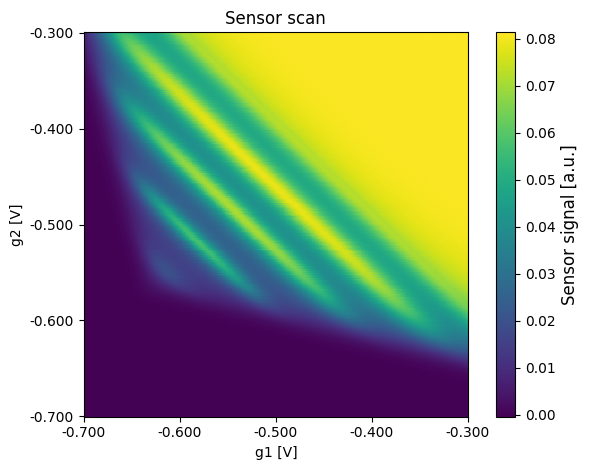

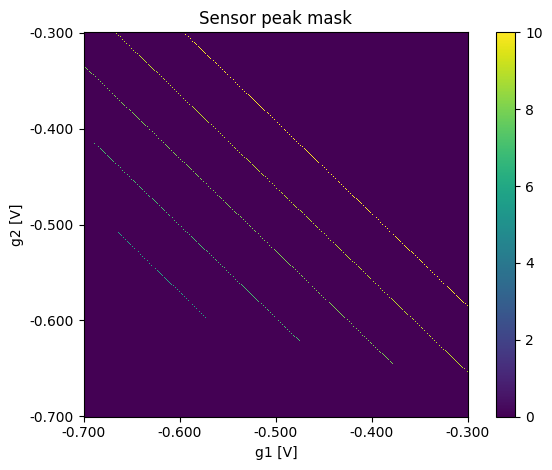

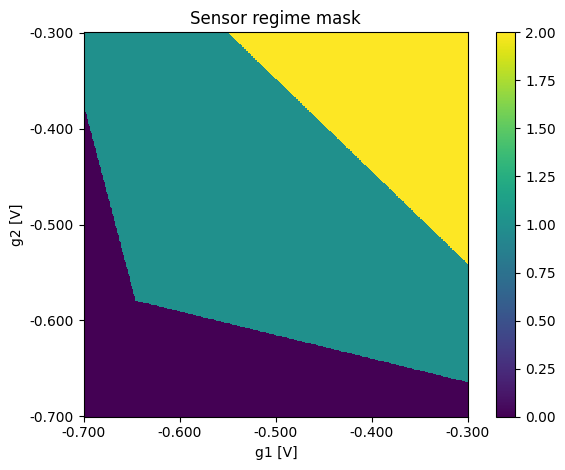

In [22]:
plot_csd(csd=scan, volt_limits_g1=sweep_range_sensor_g1, volt_limits_g2=sweep_range_sensor_g2, title="Sensor scan")
plot_csd(csd=sensor_peaks, volt_limits_g1=sweep_range_sensor_g1, volt_limits_g2=sweep_range_sensor_g2,
         title="Sensor peak mask",
         sensor_label="")
plot_csd(csd=sensor_regime_mask, volt_limits_g1=sweep_range_sensor_g1, volt_limits_g2=sweep_range_sensor_g2,
         title="Sensor regime mask", sensor_label="")

#### CSDs

The simulation can be used exactly as before. However, it should be noted that the voltages specified here for the sensor gates and plunger gates may not be optimal for the randomly sampled configuration. Therefore, there is the possibility that not much can be seen in the CSD.

In [23]:
# double dot voltages
sweep_range_g1 = np.array([-0.2, -0.06])
sweep_range_g2 = np.array([-0.2, -0.06])
resolution = np.array([400, 400])  # first entry is (plunger) gate 1 resolution and second entry (plunger) gate 2 resolution

# sensor dot voltages
volt_sensor_g1 = -0.5
volt_sensor_g2 = -0.57

csd, occupations, lead_transitions, metadata = double_dot_device.measure(
    sweep_range_g1=sweep_range_g1,
    sweep_range_g2=sweep_range_g2,
    volt_sensor_g1=volt_sensor_g1,
    volt_sensor_g2=volt_sensor_g2,
    resolution=resolution,
)

##### Plot the results

Using the function `plot_csd` it is possible to plot the results of the simulation. It can be used for the CSD itself and also for the ground truth data.

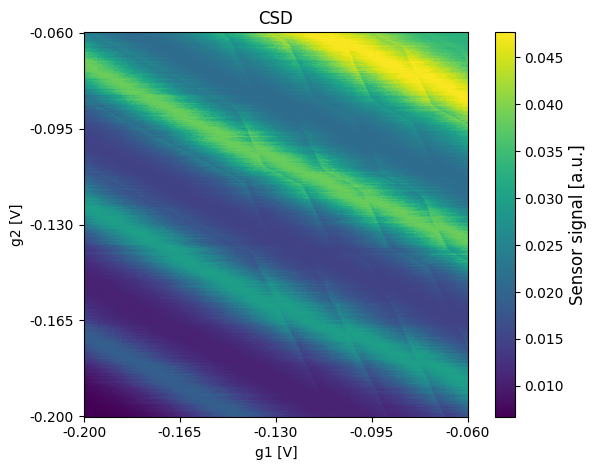

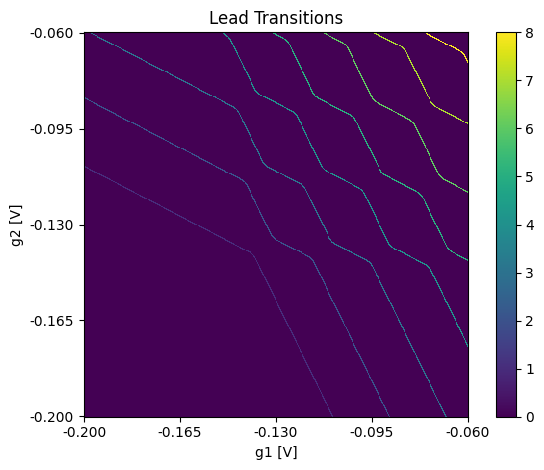

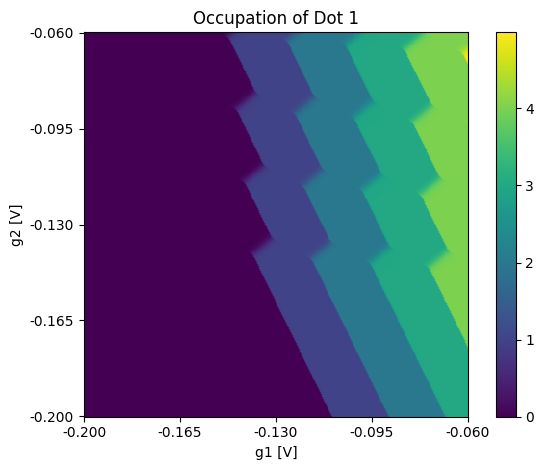

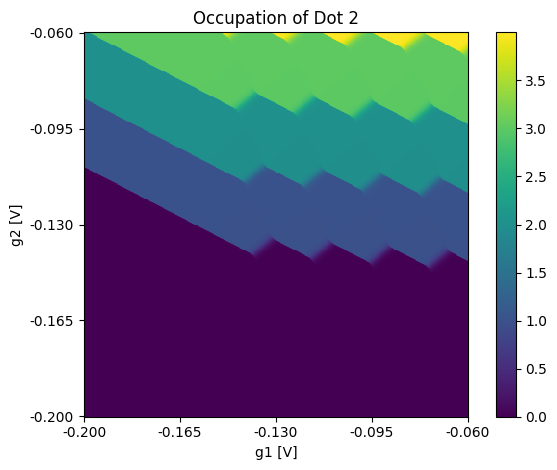

In [24]:
plot_csd(csd=csd, volt_limits_g1=sweep_range_g1, volt_limits_g2=sweep_range_g2, title="CSD")
plot_csd(csd=lead_transitions, volt_limits_g1=sweep_range_g1, volt_limits_g2=sweep_range_g2, title="Lead Transitions", sensor_label="")
plot_csd(csd=occupations[:, :, 0], volt_limits_g1=sweep_range_g1, volt_limits_g2=sweep_range_g2,
         title="Occupation of Dot 1", sensor_label="")
plot_csd(csd=occupations[:, :, 1], volt_limits_g1=sweep_range_g1, volt_limits_g2=sweep_range_g2,
         title="Occupation of Dot 2", sensor_label="")